# Exploratory Data Analysis
We will use this section below to do exploratory data analysis.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import seaborn as sns
from IPython import display
%matplotlib inline

games = pd.read_csv('./games_data.csv')
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Check for biases in wins and/or rating
This section goes over the distributions of white and black pieces to make sure that the player ratings are approximately the same. I want to verify that the dataset is not biased in wins or player rating towards white or black pieces.

In [3]:
# Investigating the distribution of ratings for white.
# Distributions for white and black ratings are approximately equal. 
games['white_rating'].describe()

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [7]:
# Investigating the distribution of ratings for black.
# Distributions for white and black ratings are approximately equal. 
games['black_rating'].describe()

count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64

In [4]:
# Using the shape attribute to confirm that there are 20,058 chess games, with 16 features (columns) in the dataset 
# stored in 'games.csv'
games.shape

(20058, 16)

In [5]:
# Finding out the features for each game.
games.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [8]:
# Checking to see if there are any missing values for the white pieces' rating, represented by 
# the pandas series "games['white_rating']".
# A value of 0.0 confirms that there are no missing values since boolean values of True = 1, False = 1. 
games['white_rating'].isnull().sum()/games.shape[0]

0.0

In [9]:
# Checking to see if there are any missing values for the black pieces' rating, represented by 
# the pandas series "games['black_rating']"".
# A value of 0.0 confirms that there are no missing values.
games['black_rating'].isnull().sum()/games.shape[0]

0.0

In [10]:
white_ratings = games['white_rating'].values # converting from pandas series to array

### The two plots below show that player ratings are roughly equal across all 20,058 games played.

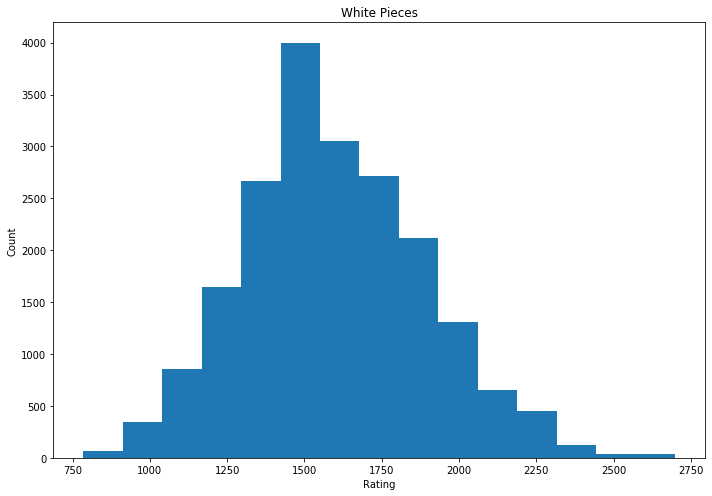

In [248]:
# Using the white_ratings array from the previous step to create a 15 bin histogram of the distribution of white
# ratings.
fig, axs = plt.subplots(figsize =(10, 7), tight_layout = True) 
axs.hist(white_ratings, bins = 15) # using array values to plot 

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title('White Pieces')
plt.show()

In [12]:
black_ratings = games['black_rating'].values # converting from pandas series to array

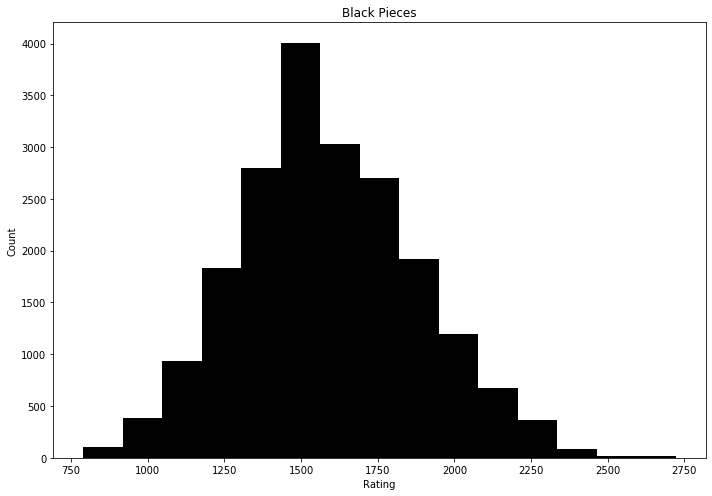

In [247]:
# Using the black_ratings array from the previous step to create a 15 bin histogram of the distribution of black 
# ratings.
fig, axs = plt.subplots(figsize =(10, 7), tight_layout = True) 
axs.hist(black_ratings, bins = 15, color='black') 

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title('Black Pieces')

plt.show()

 ### We can tell by comparing the 2 histograms above that the ratings for black and white follow a similar distribution.

In [253]:
# Calculating the rating difference between white and black. 75% of the total rating difference population is 
# <= 122 points, with a mean of 7.8 points, telling me that most games are played by players with a similar rating.
games['rating difference'] = games['white_rating'] - games['black_rating']
games['rating difference'].describe()

count    20058.000000
mean         7.799880
std        249.036667
min      -1605.000000
25%       -108.000000
50%          3.000000
75%        122.000000
max       1499.000000
Name: rating difference, dtype: float64

In [17]:
# Creating a dataframe only containing games where the white pieces won. 
games_white = games[games['winner'] == 'white']
games_white.shape

(10001, 16)

In [251]:
games_white.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10


In [18]:
# Creating a dataframe only containing games where the black pieces won and investigating size. 
games_black = games[games['winner'] == 'black']
games_black.shape

(9107, 16)

In [260]:
# Checking to see if there is a win discrepancy in the dataset.
# We can see below that there is only ~4.5% increase in games won for white, so the dataset is fairly balanced in the number of wins for each color
(10001 - 9107) / 20058

0.0445707448399641

### Plot and table below show that the number of wins on either side are close to equal

In [258]:
chess_wins = pd.DataFrame({'White Wins':[games_white.shape[0]], 'Black Wins': [games_black.shape[0]]})
chess_wins

,White Wins,Black Wins
0,10001,9107


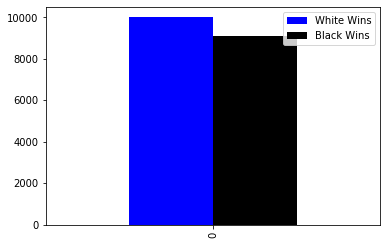

In [266]:
my_colors=['b','black']
chess_wins_plot = chess_wins.plot(kind='bar', color=my_colors)

### Openings Analysis
This section addresses answering the first question posed on the blog: are there certain openings that are more favorable to white? How about for black?

In [113]:
"""
Creating another dataframe called 'openings_white' which will count and sort by count all the openings used by white 
in games that were won by white. Note that the dataframe 'games_white' contains only the games won by white, as defined 
in the previous step.
"""

openings_white = games_white['opening_name'].value_counts().reset_index() # getting the number of counts per opening
openings_white.rename(columns={'index':'White Opening', 'opening_name': 'White Wins_Opening Count'}, inplace=True) # renaming the columns for better readability
openings_white # games where white won

,White Opening,White Wins_Opening Count
0,Scandinavian Defense: Mieses-Kotroc Variation,164
1,Sicilian Defense,149
2,Scotch Game,145
3,French Defense: Knight Variation,135
4,Philidor Defense #3,127
...,...,...
1176,Queen's Gambit Declined: Cambridge Springs Var...,1
1177,Modern Defense: Averbakh System | Kotov Varia...,1
1178,Polish Opening: Dutch Defense,1
1179,King's Gambit Accepted | Salvio Gambit,1


In [124]:
openings_white = openings_white.set_index('White Opening') # setting White Opening as the index
openings_white

,White Wins_Opening Count
White Opening,
Scandinavian Defense: Mieses-Kotroc Variation,164
Sicilian Defense,149
Scotch Game,145
French Defense: Knight Variation,135
Philidor Defense #3,127
...,...
Queen's Gambit Declined: Cambridge Springs Variation,1
Modern Defense: Averbakh System | Kotov Variation,1
Polish Opening: Dutch Defense,1


In [125]:
"""
Creating another dataframe called 'openings_black' which will count and sort by count all the openings used by black 
in games that were won by black. Note that the dataframe 'games_black' contains only the games won by black, as defined 
in the previous step.
"""

openings_black = games_black['opening_name'].value_counts().reset_index()
openings_black.rename(columns={'index':'Black Opening', 'opening_name': 'Black Wins_Opening Count'}, inplace=True)
openings_black # games where black won

,Black Opening,Black Wins_Opening Count
0,Van't Kruijs Opening,226
1,Sicilian Defense,194
2,Sicilian Defense: Bowdler Attack,164
3,Scandinavian Defense,123
4,French Defense: Knight Variation,121
...,...,...
1140,French Defense: Advance Variation | Nimzowits...,1
1141,Van Geet Opening: Dunst-Perrenet Gambit,1
1142,Sicilian Defense: Open #2,1
1143,Scotch Game: Scotch Gambit | Kingside Variation,1


In [126]:
"""
Creating another dataframe called 'openings_black' which will count and sort by count all the openings used by black 
in games that were won by black. Note that the dataframe 'games_black' contains only the games won by black, as defined 
in the previous step.
"""

openings_black = openings_black.set_index('Black Opening') # setting White Opening as the index
openings_black

,Black Wins_Opening Count
Black Opening,
Van't Kruijs Opening,226
Sicilian Defense,194
Sicilian Defense: Bowdler Attack,164
Scandinavian Defense,123
French Defense: Knight Variation,121
...,...
French Defense: Advance Variation | Nimzowitsch Gambit,1
Van Geet Opening: Dunst-Perrenet Gambit,1
Sicilian Defense: Open #2,1


In [127]:
"""
Concatenating the two dataframes (White Wins_Opening Count, Black Wins_Opening Count) along the column axis into 
one dataframe titled 'games_total'

White Wins_Opening Count = df containing games where white won
Black Wins_Opening Count = df containing games where black won
"""

games_total = pd.concat([openings_white, openings_black], axis=1) 
games_total = games_total.fillna(0) # If there are any NaN values, replace with integer 0.
games_total

,White Wins_Opening Count,Black Wins_Opening Count
Scandinavian Defense: Mieses-Kotroc Variation,164.0,89.0
Sicilian Defense,149.0,194.0
Scotch Game,145.0,115.0
French Defense: Knight Variation,135.0,121.0
Philidor Defense #3,127.0,67.0
...,...,...
Bird Opening: Sturm Gambit,0.0,1.0
Italian Game: Two Knights Defense | Traxler Counterattack,0.0,1.0
French Defense: Advance Variation | Nimzowitsch Gambit,0.0,1.0
Scotch Game: Scotch Gambit | Kingside Variation,0.0,1.0


For all games, this shows the distribution of wins for black and white as a function of the opening used.

In [281]:
games_total['Difference in Games Won'] = games_total['White Wins_Opening Count'] - games_total['Black Wins_Opening Count']
games_total['Difference in Games Won(abs)'] = abs(games_total['White Wins_Opening Count'] - games_total['Black Wins_Opening Count'])
games_total.sort_values(by='Difference in Games Won(abs)', ascending=False).astype(int).style.bar(subset=['Difference in Games Won'], align='mid', color=['#403f3f','#56acef'])

Above is a table showing the opening used, the number of wins by white and black employing the opening, 
and the difference in the number of wins - both relative and absolute. The table is sorted by the 
absolute value of the difference in games won (descending).

In [282]:
# 1,453 different openings were used by white and black over 20,058 games played.
games_total.shape

(1453, 4)

In [92]:
# Over 20,058 games, 950 games were drawn.
games_draw = games[games['winner'] == 'draw']
games_draw.shape[0]

950

# Opening Bias between Rated and Non-Rated Games
This section is to see if there is any bias in openings played between rated versus non-rated games.

Note: Out of 20,058 total games played, there were 16,155 rated games vs. 3,903 non-rated games. A lot MORE games were played rated vs. non-rated.

In [3]:
# Creating a dataframe titled 'games_rated' that contains only games that were rated.

games_rated = games[games['rated'] == True] #16,155 rated games. A lot MORE games were played rated vs. non-rated
games_rated.shape

(16155, 16)

In [101]:
# checking to see if there are any null values in games['rated'] series. The value of 0 confirms there are no null values
games['rated'].isnull().sum() 

0

In [46]:
games_rated[games_rated['winner'] == 'white'].shape #8,052 of 16,155 rated games were won by white

(8052, 16)

Distributions for white and black ratings in rated games are approximately equal, as shown below.

In [131]:
# Investigating the distribution of ratings for white for rated games only.
games_rated['white_rating'].describe()

count    16155.000000
mean      1597.102012
std        284.178397
min        784.000000
25%       1396.000000
50%       1577.000000
75%       1794.000000
max       2622.000000
Name: white_rating, dtype: float64

In [4]:
# Investigating the distribution of ratings for white for rated games only.
games_rated['black_rating'].describe()

count    16155.000000
mean      1593.503188
std        289.627160
min        789.000000
25%       1390.000000
50%       1573.000000
75%       1791.000000
max       2588.000000
Name: black_rating, dtype: float64

In [133]:
games_rated[games_rated['winner'] == 'black'].shape #7,384 of 16,155 rated games were won by black

(7384, 16)

In [98]:
games_nonrated = games[games['rated'] == False]  #3,903 non-rated games. A lot LESS games were played rated vs. non-rated
games_nonrated.shape

(3903, 16)

In [188]:
"""
Creating another dataframe called 'rated_openings_white' which will count and sort by count all the openings used by white 
in RATED games that were won by black. Note that the dataframe 'rated_games_white' contains only the games won by white, as defined 
in the previous step.
"""

rated_openings_white = rated_games_white['opening_name'].value_counts().reset_index()
rated_openings_white.rename(columns={'index':'White Opening', 'opening_name': 'White Wins_Opening Count'}, inplace=True)
rated_openings_white = rated_openings_white.set_index('White Opening') # games where white won
rated_openings_white

,White Wins_Opening Count
White Opening,
Scandinavian Defense: Mieses-Kotroc Variation,129
Sicilian Defense,125
French Defense: Knight Variation,116
Scotch Game,112
Philidor Defense #3,98
...,...
Old Indian Defense: Two Knights Variation,1
Modern Defense: Geller's System,1
Danish Gambit Accepted | Schlechter Defense,1


In [109]:
rated_games_black = games_rated[games_rated['winner'] == 'black'] # A little less number of rated games as black were played 
rated_games_black.shape

(7384, 16)

In [190]:
"""
Creating another dataframe called 'rated_openings_black' which will count and sort by count all the openings used by black 
in RATED games that were won by black. Note that the dataframe 'rated_games_black' contains only the games won by black, as defined 
in the previous step.
"""

rated_openings_black = rated_games_black['opening_name'].value_counts().reset_index()
rated_openings_black.rename(columns={'index':'Black Opening', 'opening_name': 'Black Wins_Opening Count'}, inplace=True)
rated_openings_black = rated_openings_black.set_index('Black Opening') # games where black won
rated_openings_black

,Black Wins_Opening Count
Black Opening,
Van't Kruijs Opening,198
Sicilian Defense,150
Sicilian Defense: Bowdler Attack,139
French Defense: Knight Variation,100
Scotch Game,99
...,...
Queen's Pawn Game: Zurich Gambit,1
Danish Gambit Accepted | Classical Defense,1
Franco-Benoni Defense,1


In [199]:
"""
Concatenating the two dataframes (White Wins_Opening Count, Black Wins_Opening Count) along the column axis into 
one dataframe titled 'rated_df'

White Wins_Opening Count = df containing rated games where white won
Black Wins_Opening Count = df containing rated games where black won
"""
rated_df = pd.concat([rated_openings_white, rated_openings_black], axis=1) 
rated_df = rated_df.fillna(0) # If there are any values that are NaN, replace with integer 0
rated_df

,White Wins_Opening Count,Black Wins_Opening Count
Scandinavian Defense: Mieses-Kotroc Variation,129.0,73.0
Sicilian Defense,125.0,150.0
French Defense: Knight Variation,116.0,100.0
Scotch Game,112.0,99.0
Philidor Defense #3,98.0,50.0
...,...,...
Italian Game: Two Knights Defense | Traxler Counterattack,0.0,1.0
Semi-Slav Defense: Stoltz Variation | Center Variation,0.0,1.0
Sicilian Defense: Myers Attack,0.0,1.0
Alekhine Defense #3,0.0,1.0


For rated games only, this shows the distribution of wins for black and white as a function of the opening used.

In [289]:
"""
Below is a table showing the opening used, the number of wins by white and black employing the opening, 
and the difference in the number of wins - both relative and absolute - in rated games played. The table is sorted by the 
absolute value of the difference in games won (descending).
"""

rated_df['Difference in Rated Games Won'] = rated_df['White Wins_Opening Count'] - rated_df['Black Wins_Opening Count']
rated_df['Difference in Rated Games Won(abs)'] = abs(rated_df['White Wins_Opening Count'] - rated_df['Black Wins_Opening Count'])
rated_df.sort_values(by='Difference in Rated Games Won(abs)', ascending=False).astype(int).style.bar(subset=['Difference in Rated Games Won'], align='mid', color=['#403f3f','#56acef'])

Above is a table showing the opening used, the number of wins by white and black employing the opening, 
and the difference in the number of wins - both relative and absolute. The table is sorted by the 
absolute value of the difference in games won (descending).

## Does the number of turns determine a winner? Or, does the time control affect the winner?

In [6]:
# Looking at all increment codes in the dataset. Increment codes are the time controls used. 
# Increment codes are X + Y, where X is the time remaining (in minutes) for each player, Y is the time (in seconds)
# added to a player's total time (X) after the player makes a move.
games['increment_code'].value_counts()

10+0      7721
15+0      1311
15+15      850
5+5        738
5+8        697
          ... 
45+2         1
7+18         1
180+45       1
1+45         1
90+120       1
Name: increment_code, Length: 400, dtype: int64

In [221]:
# Counting the number of wins for black during rated games by increment code

black_increment_rated = rated_games_black['increment_code'].value_counts().reset_index()
black_increment_rated.rename(columns={'index':'Increment', 'increment_code': 'Black Wins_Count'}, inplace=True)
black_increment_rated = black_increment_rated.set_index('Increment') # games where black won
black_increment_rated

,Black Wins_Count
Increment,
10+0,3175
15+0,442
15+15,325
5+5,253
5+8,237
...,...
7+12,1
3+30,1
40+9,1


In [220]:
# Counting the number of wins for white during rated games by increment code

white_increment_rated = rated_games_white['increment_code'].value_counts().reset_index()
white_increment_rated.rename(columns={'index':'Increment', 'increment_code': 'White Wins_Count'}, inplace=True)
white_increment_rated = white_increment_rated.set_index('Increment') # games where white won
white_increment_rated

,White Wins_Count
Increment,
10+0,3367
15+0,483
15+15,364
5+5,293
5+8,272
...,...
30+7,1
9+11,1
30+6,1


In [303]:
"""
Concatenating the two dataframes (white_increment_rated, black_increment_rated) along the column axis into 
one dataframe titled 'games_total'

White Wins_Opening Count = df containing games where white won
Black Wins_Opening Count = df containing games where black won
"""

total_increment = pd.concat([white_increment_rated, black_increment_rated], axis =1).fillna(0)
total_increment = total_increment.sort_values(by='Difference in Rated Games Won(abs)', ascending=False)

In [337]:
"""
Below is a table showing the increment code, the number of wins by white and black given the increment code, 
and the difference in the number of wins - both relative and absolute - in rated games played. The table is sorted by the 
absolute value of the difference in games won (ascending).
"""

total_increment['Difference'] = total_increment['White Wins_Count'] - total_increment['Black Wins_Count']
total_increment['Difference (abs)'] = abs(total_increment['White Wins_Count'] - total_increment['Black Wins_Count'])
total_increment = total_increment.sort_values(by='Difference')
total_increment

,level_0,index,Increment Code,White Wins_Count,Black Wins_Count,Difference,Difference (abs)
0,331,12,7+9,17.0,32.0,-15.0,15.0
1,330,13,10+3,53.0,67.0,-14.0,14.0
2,329,14,20+0,131.0,144.0,-13.0,13.0
3,325,18,7+2,81.0,91.0,-10.0,10.0
4,321,20,15+5,109.0,118.0,-9.0,9.0
...,...,...,...,...,...,...,...
339,339,4,5+5,293.0,253.0,40.0,40.0
340,340,3,15+0,483.0,442.0,41.0,41.0
341,341,2,15+10,181.0,139.0,42.0,42.0
342,342,1,8+0,265.0,213.0,52.0,52.0


### Graph showing that the majority of games were played with 10+0 increment code

Text(0, 0.5, 'Count')

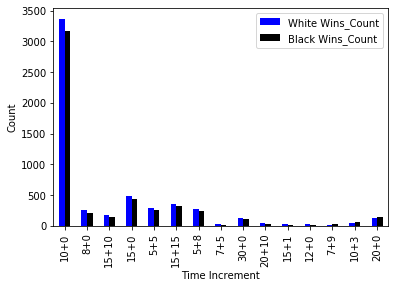

In [330]:
increment_plot_sorted = total_increment[:15].plot(x='Increment Code', y=['White Wins_Count', 'Black Wins_Count'], kind='bar', color=['b','black'])
increment_plot_sorted.set_xlabel('Time Increment')
increment_plot_sorted.set_ylabel('Count')

Finding the maximum difference equates to finding the increment code leading to the most white victories
since difference = White Wins Count - Black Wins Count. The maximum difference is +192, for increment code 10+0.
This means that increment code 10+0 led to white winning more games over black than any other increment code

In [310]:
most_win_white_increment_code = total_increment.loc[total_increment['Difference'] == total_increment['Difference'].max()]
most_win_white_increment_code

,White Wins_Count,Black Wins_Count,Difference
10+0,3367.0,3175.0,192.0


In [308]:
most_win_black_increment_code = total_increment.loc[total_increment['Difference'] == total_increment['Difference'].min()]
most_win_black_increment_code

,White Wins_Count,Black Wins_Count,Difference
7+9,17.0,32.0,-15.0


Finding the minimum difference equates to finding the increment code leading to the most black victories
since difference = White Wins Count - Black Wins Count. The minimum difference is -15, for increment code 7+9.
This means that increment code 7+9 led to black winning more games over white than any other increment code.

Text(0, 0.5, 'Count')

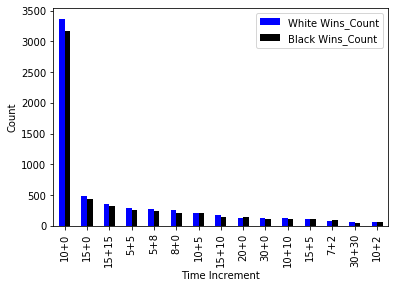

In [270]:
increment_plot = total_increment[:15].plot(kind='bar', color=['b','black'])
increment_plot.set_xlabel('Time Increment')
increment_plot.set_ylabel('Count')

Plot above shows that white won the most number of games with 10+0 increment code (confirming previous result above) 
and that 10+0 increment code was played for the majority of the games.

In [233]:
# Top 15 increment codes accounted for 76.2% of White wins 
total_increment['White Wins_Count'][:15].sum() / total_increment['White Wins_Count'].sum()

0.7619225037257824

In [131]:
# Investigating the distribution of the number of turns for white.
# Distributions for white and black number of turns are approximately equal.

games_white['turns'].describe()

count    10001.000000
mean        57.790221
std         32.193353
min          1.000000
25%         35.000000
50%         53.000000
75%         75.000000
max        349.000000
Name: turns, dtype: float64

In [129]:
# Investigating the distribution of the number of turns for black.
# Distributions for white and black number of turns are approximately equal.

games_black['turns'].describe()

count    9107.000000
mean       60.724388
std        32.369867
min         1.000000
25%        38.000000
50%        56.000000
75%        78.000000
max       222.000000
Name: turns, dtype: float64

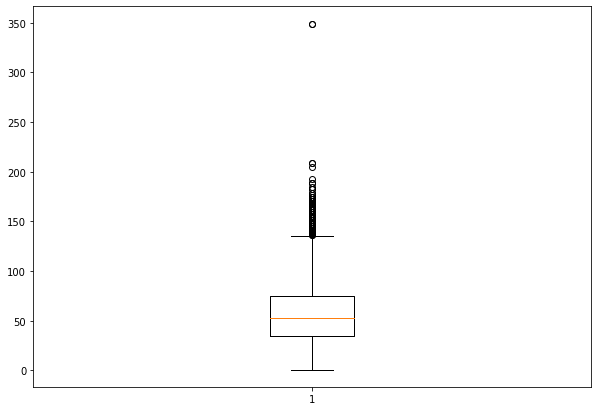

In [339]:
white_turn_data = games_white['turns'].values
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(white_turn_data) 
plt.show() 

Box plot creation for the number of turns for the white pieces. 
The first quartile (line at y=35) accounts for 25% of the values.
The median of the values is the yellow line at y = 53.
The third quartile (line at y=75) accounts for 75% of the values. The remaining points account for the remaining 25% of values. Notice the lone outlier game that lasted for 349 turns.

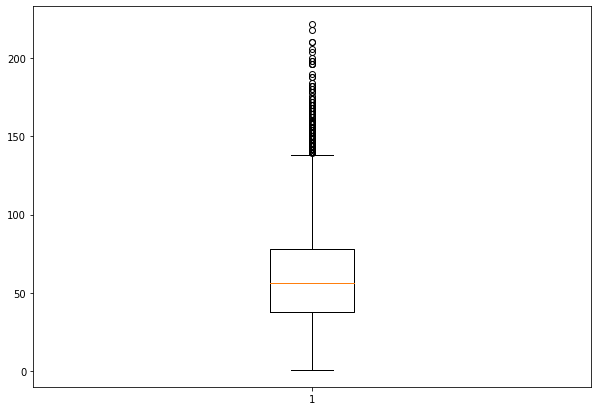

In [349]:
black_turn_data = games_black['turns'].values
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(black_turn_data) 
plt.show() 

Box plot creation for the number of turns for the black pieces. 
The first quartile (line at y=38) accounts for 25% of the values.
The median of the values is the yellow line at y = 56.
The third quartile (line at y=78) accounts for 75% of the values.
The remaining points account for the remaining 25% of values, with maximum at 222 turns.

Outcomes were largely indepenent of the number of turns, as shown on the box plots below.

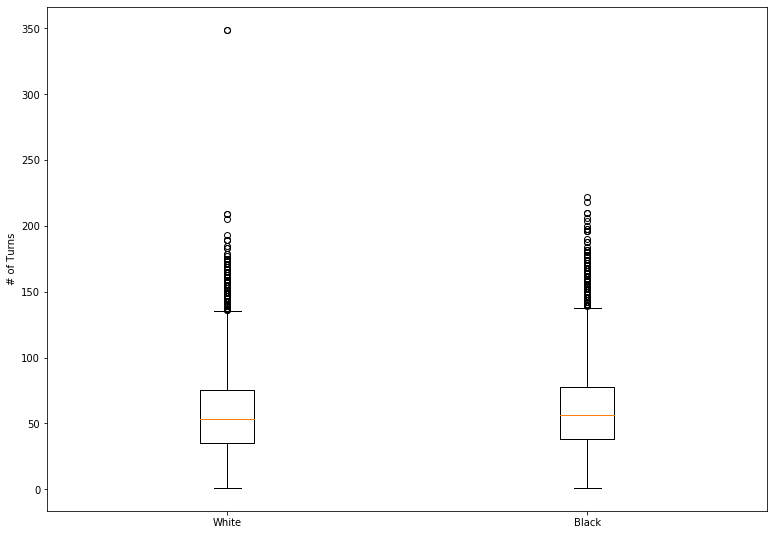

In [353]:
data = [white_turn_data, black_turn_data] 
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, labels=('White', 'Black'))
plt.ylabel('# of Turns')
plt.show()

### Putting both box plots for white and black into one figure (shown above). Both box plots exhibit similar value distributions.

# Training and Prediction of Chess Winner

In [6]:
games['winner'].replace({'black': 0, 'white': 1}) #encoding winner series into 0 for black winner, 1 for white winner

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: winner, Length: 20058, dtype: object

In [7]:
# encoding winner series into 0 for black winner, 1 for white winner
# we are not considering drawn games in our analysis, so we are encoding NaN for drawn games 
games['winner_binary'] = games['winner'].replace({'black': 0, 'white': 1, 'draw': np.NaN}) 

In [368]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the features we will use as inputs to our logisitc regression model
    y - the corresponding binary response vector showing the winner (either black or white)
    
    This function cleans the df using the following steps to produce X and y:
    2. Create X as all the columns that are not the winner_binary column
    3. Create y as the winner_binary column
    4. Drop the 'id', 'created_at', 'last_move_at', 'victory_status', 'white_id', 'black_id' columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, and drop the original columns
    '''
    # Drop rows with draws
    df = df.dropna(subset=['winner_binary'], axis=0) 
    """
    Since we are not considering draws in our analysis, we are dropping any games with drawn endings from the dataframe. 
    In the previous step, we had encoded drawn openings with NaN. Here we are dropping from our dataframe all rows with 
    NaN under column 'winner_binary', thereby eliminating all drawn games from our dataset.
    """
    
    #Drop columns that we feel do not impact overall game outcome
    df = df.drop(['id', 'created_at', 'last_move_at', 'victory_status', 'white_id', 'black_id'], axis=1)
    
    # Fill numeric columns' missing values with the mean
    """
    Here we are dealing with any possible missing numerical values by filling them with the mean of the column, rather 
    than eliminating them from the dataset. Since there are thousands of rows in our dataset, we will use the mean as a good 
    approximation to fill in the missing values (if any), rather than eliminating the entire row entirely and lose information.
    """
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables. Encoding categorical variables for analysis.
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)  
    
    # Returning X, which is the input matrix, with all categorical variables encoded and any missing numerical values filled with the mean of the column
    # Returning y, the winner_binary response vector
    X = df
    y = df['winner_binary']
    
    return X, y

In [369]:
#Use the clean_dat function to create X and y
X, y = clean_data(games)    

In [10]:
def fit_logistic_regression(X, y, test_size=.3, rand_state=42):
    '''
    INPUT:
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector showing the winner (either black or white)
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
  
    1. Create training and test sets of data
    2. Instantiate a Logistic Regression model
    3. Fit our model to the training data
    4. Predict the response for the training data and the test data
    5.Score the performance
    '''
    # Split into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    # Instantiate the model and fit training data. Solver used is Stochastic Average Gradient descent solver 
    log_reg = LogisticRegression(random_state=10, solver = 'sag') 
    
    #Fit data
    log_reg.fit(X_train, y_train) 

    #Predict using your model
    y_pred = log_reg.predict(X_train)

    # predict_proba - Probability estimates
    pred_proba = log_reg.predict_proba(X_train)
    
    #Score using your model
    
    # Accuracy on Train
    print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

    # Accuracy on Test
    print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


    return pred_proba, log_reg, y_pred, X_train, X_test, y_train, y_test

In [372]:
#logistic regression result for multiple input features (~7% higher than prediction using rating alone)
fit_logistic_regression(X,y) #multiple input variables result

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The Training Accuracy is:  0.7217943925233645
The Testing Accuracy is:  0.7205651491365777


(array([[0.49295415, 0.50704585],
        [0.54710479, 0.45289521],
        [0.75933613, 0.24066387],
        ...,
        [0.55788516, 0.44211484],
        [0.48718952, 0.51281048],
        [0.37026178, 0.62973822]]),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=10, solver='sag', tol=0.0001, verbose=0,
                    warm_start=False),
 array([1., 0., 0., ..., 0., 1., 1.]),
        rated  turns  white_rating  black_rating  opening_ply  \
 8146    True     86          1370          1327            4   
 2058    True     56          1437          1475            3   
 9478   False     53          1525          1888            5   
 5814    True     32          1749          2040            2   
 1836   False     34          1343          1328            4   
 ...      ...    ...    

In [2]:
def clean_data_rating_only(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    2. Create X as all the columns that are not the winner_binary column
    3. Create y as the winner_binary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop games where a draw was reached
    df = df.dropna(subset=['winner_binary'], axis=0)
    """
    Since we are not considering draws in our analysis, we are dropping any games with drawn endings from the dataframe. 
    In the previous step, we had encoded drawn openings with NaN. Here we are dropping from our dataframe all rows with 
    NaN under column 'winner_binary', thereby eliminating all drawn games from our dataset.
    """
    # y is the winner_binary response vector
    y = df['winner_binary']
    
    # Our input matrix X this time is the concatenation along the x-axis of ratings for white and black only, and not incorporating any other feature.
    X = pd.concat([df['white_rating'], df['black_rating']], axis=1)
    
    return X, y

In [8]:
#Use the rating only vector as your input and y response vector of winners function to create X and y
X, y = clean_data_rating_only(games)

In [11]:
#logistic regression result for rating only as the input vector (~7% less accurate compared to using multiple features)
fit_logistic_regression(X,y)

The Training Accuracy is:  0.6517383177570093
The Testing Accuracy is:  0.652537938252224


(array([[0.44714787, 0.55285213],
        [0.52310286, 0.47689714],
        [0.78941944, 0.21058056],
        ...,
        [0.52666741, 0.47333259],
        [0.46629384, 0.53370616],
        [0.37033573, 0.62966427]]),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=10, solver='sag', tol=0.0001, verbose=0,
                    warm_start=False),
 array([1., 0., 0., ..., 0., 1., 1.]),
        white_rating  black_rating
 8146           1370          1327
 2058           1437          1475
 9478           1525          1888
 5814           1749          2040
 1836           1343          1328
 ...             ...           ...
 11803          1500          1233
 12543          1085          2171
 5653           1673          1717
 905            1544          1523
 16566          1691         